In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import dct
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

In [35]:
sample_rate, signal = wavfile.read('data/OSR_us_000_0010_8k.wav')
signal = signal[: int(3.5 * sample_rate)] # Keep first 3.5 second data

signal_fft_r = np.fft.fft(signal)
signal_fft_r = np.abs(signal_fft_r)


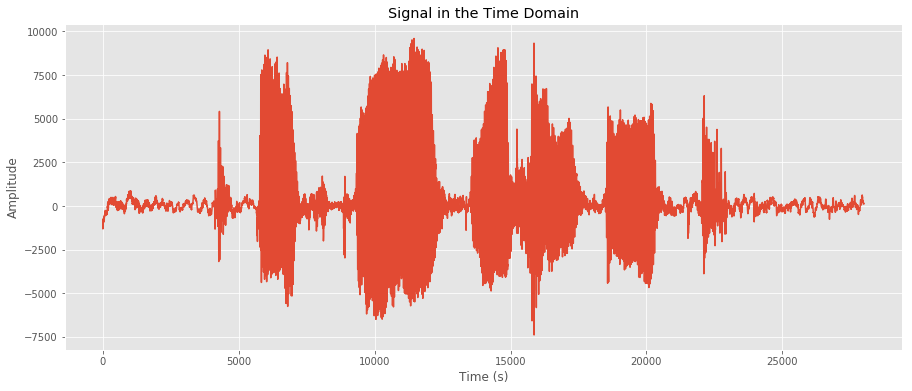

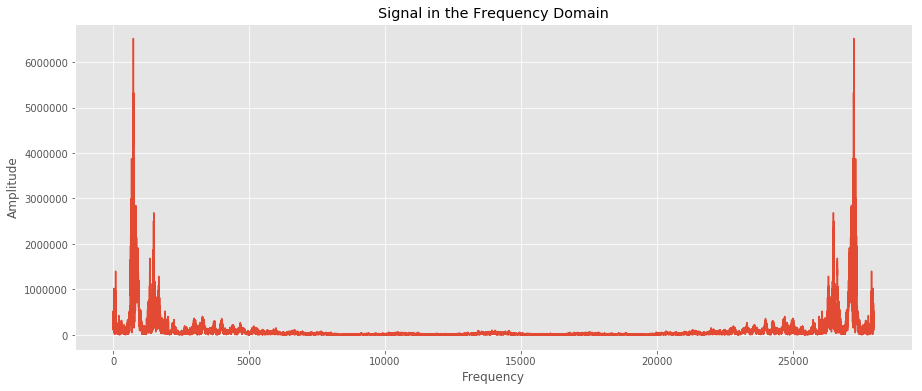

In [36]:
#Raw signal
plt.plot(signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal in the Time Domain')
plt.show()

In [37]:
pre_emphasis = 0.97
emphasized_signal =  np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])


emphasized_signal_fft_r = np.fft.fft(emphasized_signal)
emphasized_signal_fft_r = np.abs(emphasized_signal_fft_r)



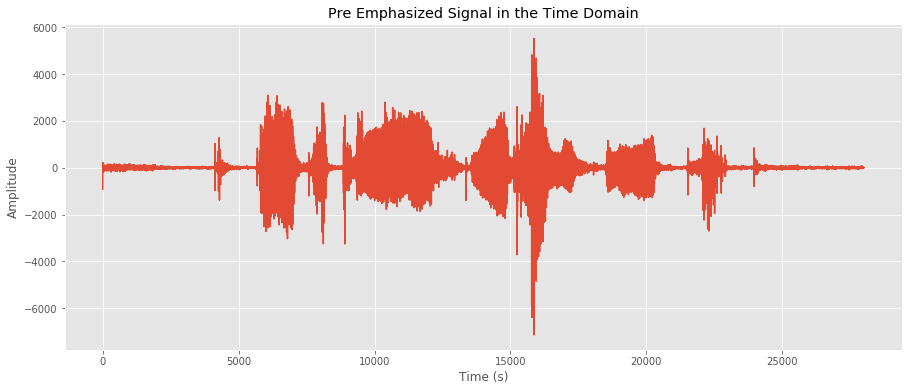

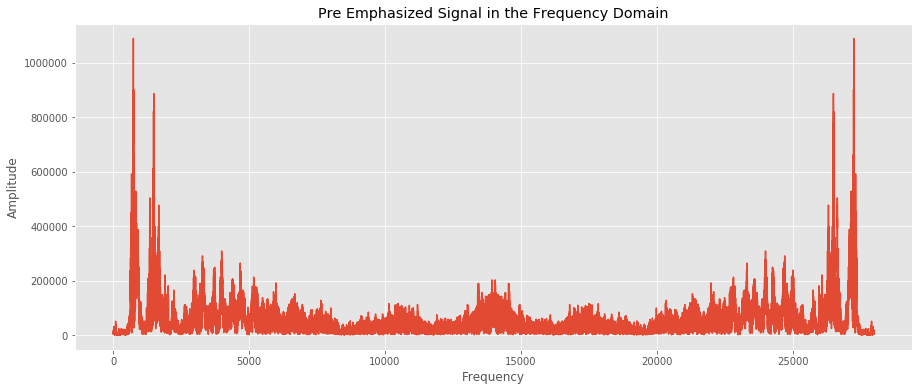

In [40]:
#Pre-emphasized signal
plt.plot(emphasized_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Pre Emphasized Signal in the Time Domain')
plt.show()


plt.plot(emphasized_signal_fft_r)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Pre Emphasized Signal in the Frequency Domain')
plt.show()

In [28]:
frame_size = 0.025  # Frame size in seconds
frame_stride = 0.01 # Frame overlap in seconds

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate

signal_length = len(emphasized_signal)
frame_length = int(frame_length)
frame_step = int(frame_step)

num_frames = int(np.ceil(float(np.abs(signal_length - frame_length))/frame_step))

pad_signal_length = num_frames * frame_step + frame_length
padding = np.zeros((pad_signal_length - signal_length))

padded_signal = np.append(emphasized_signal, padding)

np.arange(0, frame_length)

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T         
frames = padded_signal[indices.astype(np.int32, copy=False)]

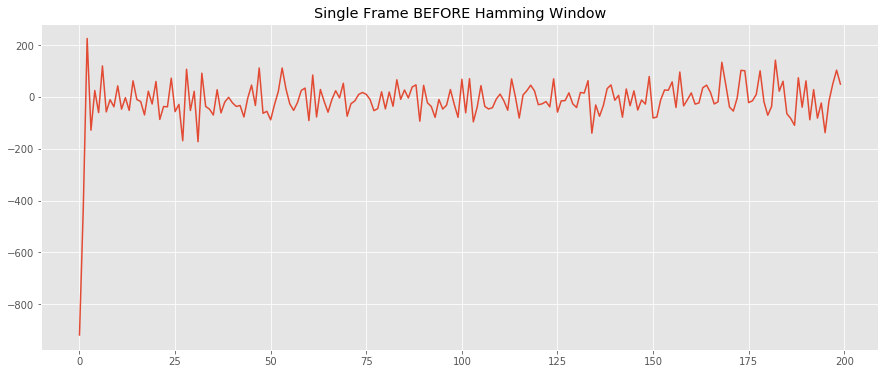

In [30]:
plt.plot(frames[0])
plt.title('Single Frame BEFORE Hamming Window')
plt.show()

In [31]:
frames *= np.hamming(frame_length)

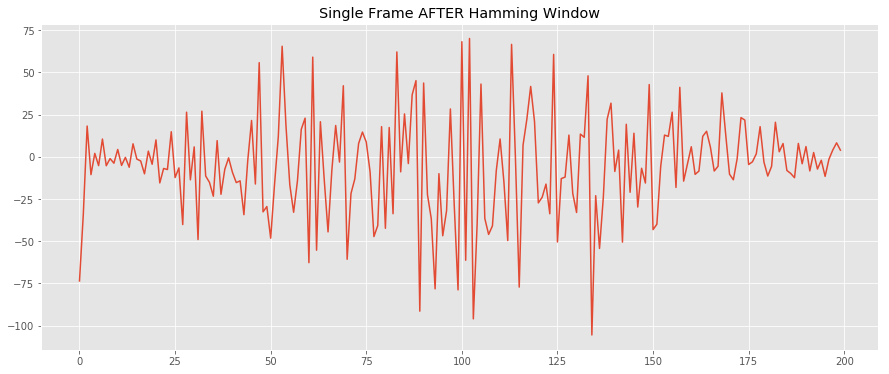

In [32]:
plt.plot(frames[0])
plt.title('Single Frame AFTER Hamming Window')
plt.show()

N -point FFT on each frame to calculate the frequency spectrum, which is also called Short-Time Fourier-Transform (STFT), where N is typically 256 or 512, NFFT = 512; and then compute the power spectrum (periodogram) using the following equation:

$$P = \frac{|FFT(x_i)|^2}{N}$$

In [33]:
N_point_FFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, N_point_FFT))
power_frames = ((1.0/N_point_FFT)*(mag_frames)**2)

In [34]:
#http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html